In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# CSV 파일에서 데이터 읽기
df = pd.read_csv('/content/산화리튬.csv')

# 불필요한 열 제거
df = df[['Period', 'FlowCode', 'NetWgt']]

# 날짜 형식 변환
df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')
df.set_index('Period', inplace=True)

# NaN 값 제거
df = df.dropna()

# 수입(M)과 수출(X) 데이터를 분리하여 월별 합계 계산
df_import = df[df['FlowCode'] == "M"].resample('M').sum()
df_export = df[df['FlowCode'] == "X"].resample('M').sum()

# 데이터 확인
print("수입 데이터:")
print(df_import)
print("수출 데이터:")
print(df_export)

수입 데이터:
                                                     FlowCode       NetWgt
Period                                                                    
2000-01-31                                      MMMMMMMMMMMMM   174541.820
2000-02-29                                 MMMMMMMMMMMMMMMMMM    57017.400
2000-03-31                               MMMMMMMMMMMMMMMMMMMM   145475.056
2000-04-30                                     MMMMMMMMMMMMMM   214642.000
2000-05-31                                MMMMMMMMMMMMMMMMMMM   212851.889
...                                                       ...          ...
2024-01-31  MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...  4007507.905
2024-02-29  MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...  4924677.108
2024-03-31  MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...  4917407.102
2024-04-30                 MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM  4190765.158
2024-05-31                                                MMM    14002.000

[293 rows x 2 co

In [ ]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


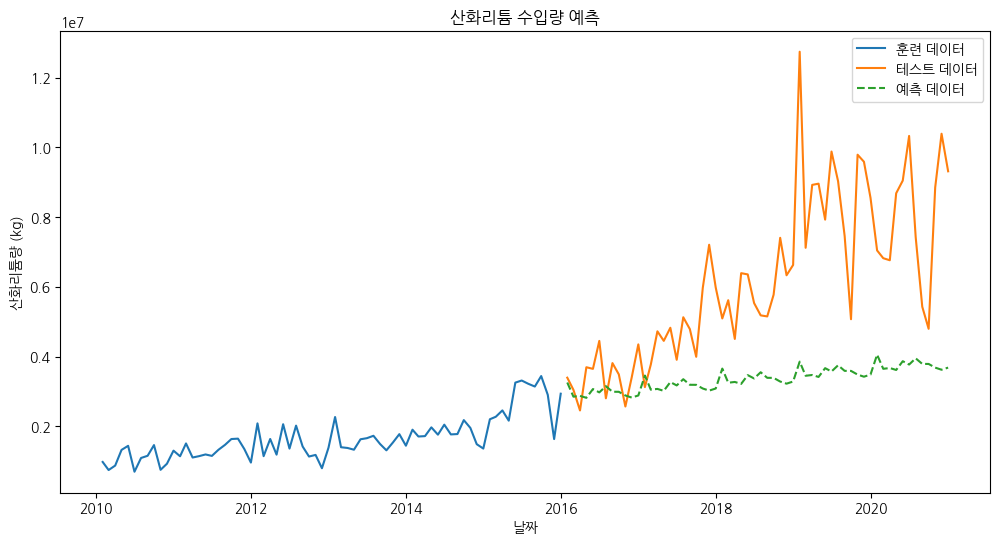

산화리튬 수입량 예측의 MSE: 12367788934872.885


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


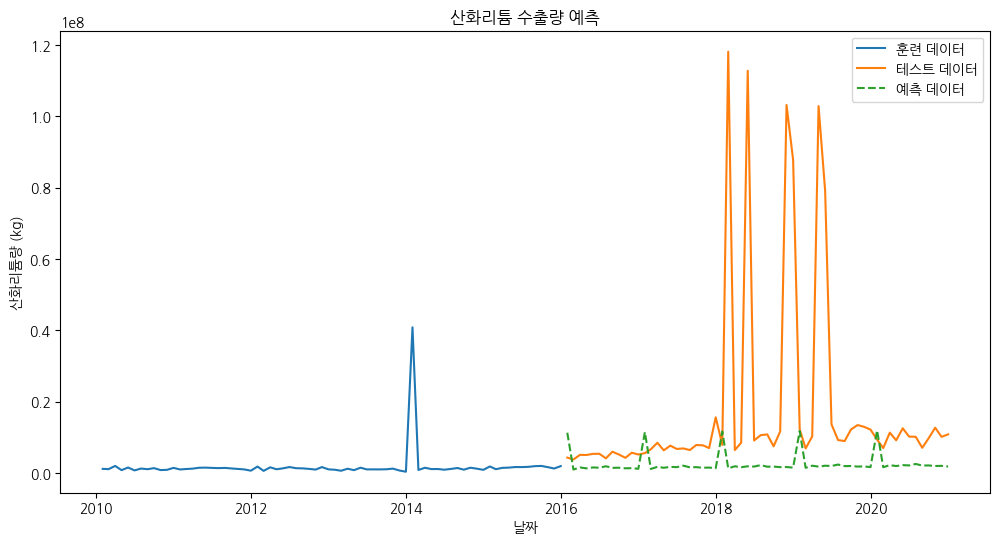

산화리튬 수출량 예측의 MSE: 1042825483593919.8
수입 데이터의 MSE: 12367788934872.885
수출 데이터의 MSE: 1042825483593919.8


In [ ]:
# 모델 학습 및 예측 함수 정의 (Holt-Winters)
def train_and_forecast_holt_winters(df, start_train, end_train, start_test, end_test, title):
    train = df[start_train:end_train]
    test = df[start_test:end_test]

    model = ExponentialSmoothing(train['NetWgt'], trend='add', seasonal='add', seasonal_periods=12)
    fit = model.fit()
    forecast = fit.forecast(steps=len(test))

    # 예측값과 실제값 비교
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['NetWgt'], label='훈련 데이터')
    plt.plot(test.index, test['NetWgt'], label='테스트 데이터')
    plt.plot(forecast.index, forecast, label='예측 데이터', linestyle='--')
    plt.xlabel('날짜')
    plt.ylabel('산화리튬량 (kg)')
    plt.title(title)
    plt.legend()
    plt.show()

    # 정확도 평가
    mse = mean_squared_error(test['NetWgt'], forecast)
    print(f"{title}의 MSE: {mse}")
    return mse

# 수입 데이터 예측 및 시각화
mse_import = train_and_forecast_holt_winters(df_import, '2010-01', '2015-12', '2016-01', '2020-12', '산화리튬 수입량 예측')

# 수출 데이터 예측 및 시각화
mse_export = train_and_forecast_holt_winters(df_export, '2010-01', '2015-12', '2016-01', '2020-12', '산화리튬 수출량 예측')

# 정확도 평가 결과 출력
print(f"수입 데이터의 MSE: {mse_import}")
print(f"수출 데이터의 MSE: {mse_export}")


수입 데이터:
                                                     FlowCode       NetWgt
Period                                                                    
2000-01-31                                      MMMMMMMMMMMMM   174541.820
2000-02-29                                 MMMMMMMMMMMMMMMMMM    57017.400
2000-03-31                               MMMMMMMMMMMMMMMMMMMM   145475.056
2000-04-30                                     MMMMMMMMMMMMMM   214642.000
2000-05-31                                MMMMMMMMMMMMMMMMMMM   212851.889
...                                                       ...          ...
2024-01-31  MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...  4007507.905
2024-02-29  MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...  4924677.108
2024-03-31  MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...  4917407.102
2024-04-30                 MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM  4190765.158
2024-05-31                                                MMM    14002.000

[293 rows x 2 co

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


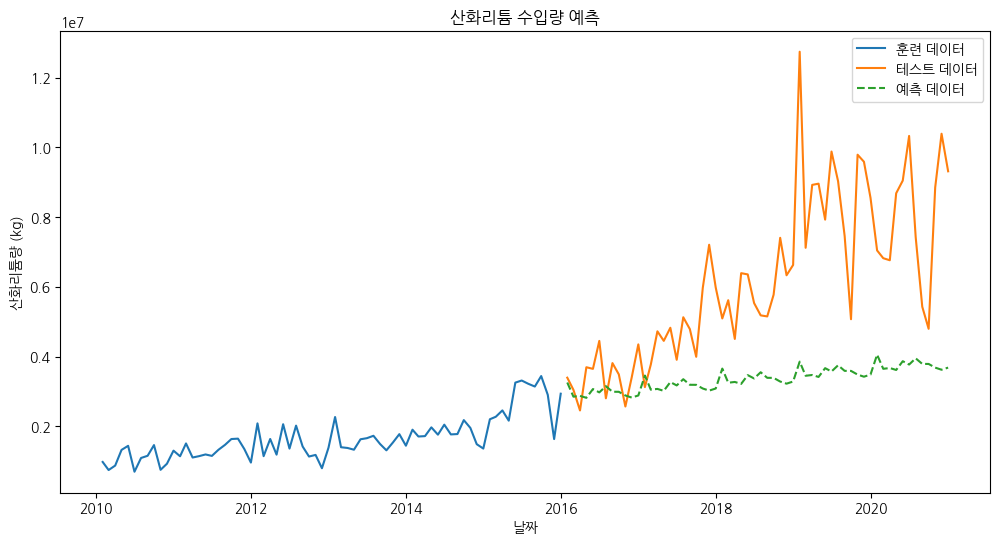

산화리튬 수입량 예측의 MSE: 12367788934872.885
산화리튬 수입량 예측의 MAE: 2834412.1284889993


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


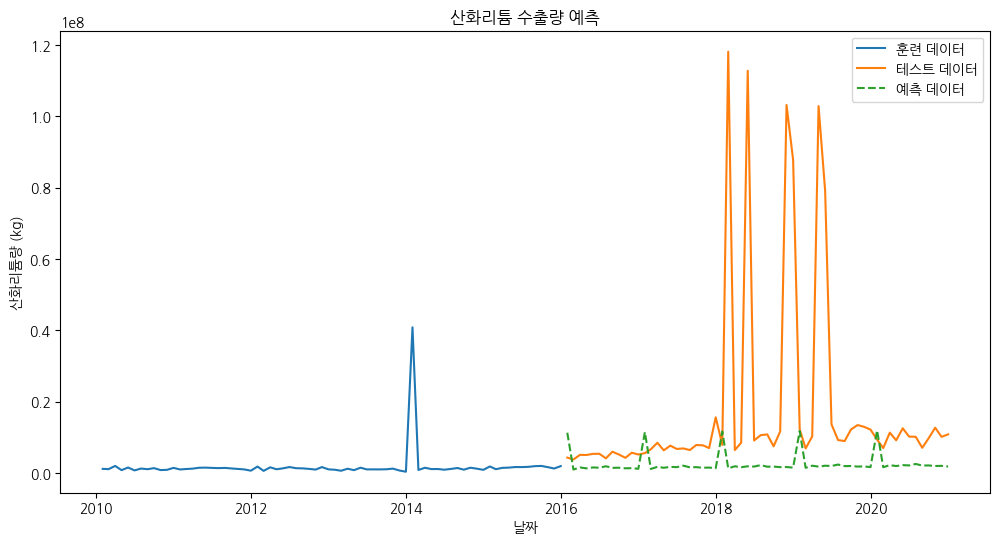

산화리튬 수출량 예측의 MSE: 1042825483593919.8
산화리튬 수출량 예측의 MAE: 15763756.769611005
수입 데이터의 MSE: 12367788934872.885
수입 데이터의 MAE: 2834412.1284889993
수출 데이터의 MSE: 1042825483593919.8
수출 데이터의 MAE: 15763756.769611005


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# CSV 파일에서 데이터 읽기
df = pd.read_csv('/content/산화리튬.csv')

# 불필요한 열 제거
df = df[['Period', 'FlowCode', 'NetWgt']]

# 날짜 형식 변환
df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')
df.set_index('Period', inplace=True)

# NaN 값 제거
df = df.dropna()

# 수입(M)과 수출(X) 데이터를 분리하여 월별 합계 계산
df_import = df[df['FlowCode'] == "M"].resample('M').sum()
df_export = df[df['FlowCode'] == "X"].resample('M').sum()

# 데이터 확인
print("수입 데이터:")
print(df_import)
print("수출 데이터:")
print(df_export)

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 모델 학습 및 예측 함수 정의 (Holt-Winters)
def train_and_forecast_holt_winters(df, start_train, end_train, start_test, end_test, title):
    train = df[start_train:end_train]
    test = df[start_test:end_test]

    model = ExponentialSmoothing(train['NetWgt'], trend='add', seasonal='add', seasonal_periods=12)
    fit = model.fit()
    forecast = fit.forecast(steps=len(test))

    # 예측값과 실제값 비교
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['NetWgt'], label='훈련 데이터')
    plt.plot(test.index, test['NetWgt'], label='테스트 데이터')
    plt.plot(forecast.index, forecast, label='예측 데이터', linestyle='--')
    plt.xlabel('날짜')
    plt.ylabel('산화리튬량 (kg)')
    plt.title(title)
    plt.legend()
    plt.show()

    # 정확도 평가
    mse = mean_squared_error(test['NetWgt'], forecast)
    mae = mean_absolute_error(test['NetWgt'], forecast)
    print(f"{title}의 MSE: {mse}")
    print(f"{title}의 MAE: {mae}")
    return mse, mae

# 수입 데이터 예측 및 시각화
mse_import, mae_import = train_and_forecast_holt_winters(df_import, '2010-01', '2015-12', '2016-01', '2020-12', '산화리튬 수입량 예측')

# 수출 데이터 예측 및 시각화
mse_export, mae_export = train_and_forecast_holt_winters(df_export, '2010-01', '2015-12', '2016-01', '2020-12', '산화리튬 수출량 예측')

# 정확도 평가 결과 출력
print(f"수입 데이터의 MSE: {mse_import}")
print(f"수입 데이터의 MAE: {mae_import}")
print(f"수출 데이터의 MSE: {mse_export}")
print(f"수출 데이터의 MAE: {mae_export}")
